In [176]:
from skimage import io, color, filters, exposure, feature, measure, morphology
from skimage.util import random_noise
from skimage.filters import median
import matplotlib.pyplot as plt
import numpy as np



Load and Display the Grayscale ImageLoad and Display the Grayscale Image

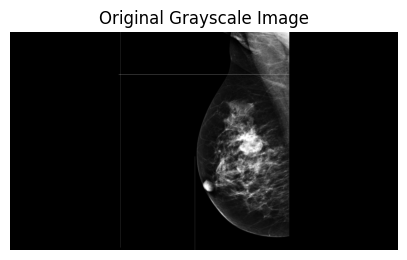

In [177]:
# Load the image
image = io.imread('/content/drive/MyDrive/DIP/Project/Images/Aug_1.jpg')

# Convert to grayscale if needed
if len(image.shape) == 2:  # Grayscale images have 2 dimensions
    gray_image = image
else:
    from skimage.color import rgb2gray
    gray_image = rgb2gray(image)

# # Display the original grayscale image
plt.figure(figsize=(5, 5))
plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.title("Original Grayscale Image")
plt.show()


Add Salt-and-Pepper Noise

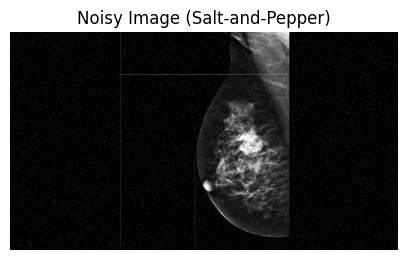

In [178]:
# Add Salt-and-Pepper noise with a rate of 0.03
noisy_image = random_noise(gray_image, mode='s&p', amount=0.03)

# Display the noisy image
plt.figure(figsize=(5, 5))
plt.imshow(noisy_image, cmap="gray")
plt.axis("off")
plt.title("Noisy Image (Salt-and-Pepper)")
plt.show()


Denoise Using Median Filter

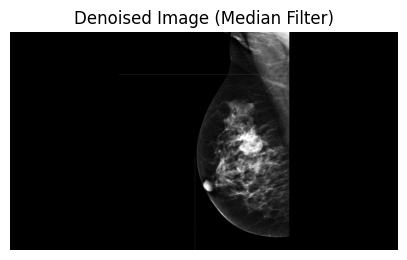

In [179]:
# Apply Median Filter to remove Salt-and-Pepper noise
denoised_image = median(noisy_image, morphology.disk(2))  # Use a disk-shaped filter with radius 2

# Display the denoised image
plt.figure(figsize=(5, 5))
plt.imshow(denoised_image, cmap="gray")
plt.axis("off")
plt.title("Denoised Image (Median Filter)")
plt.show()


Enhance the Image with CLAHE

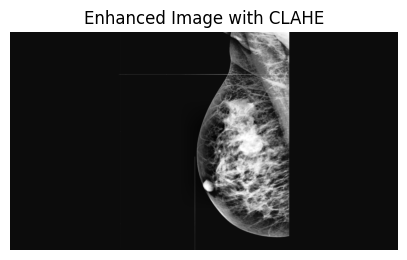

In [180]:
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe_image = exposure.equalize_adapthist(denoised_image, clip_limit=0.06)

# Display the enhanced image
plt.figure(figsize=(5, 5))
plt.imshow(clahe_image, cmap="gray")
plt.axis("off")
plt.title("Enhanced Image with CLAHE")
plt.show()


Apply Thresholding

In [181]:
# Apply adaptive thresholding
local_thresh = filters.threshold_local(clahe_image, block_size=65, offset=40)
binary_image = clahe_image > local_thresh




Detect Edges

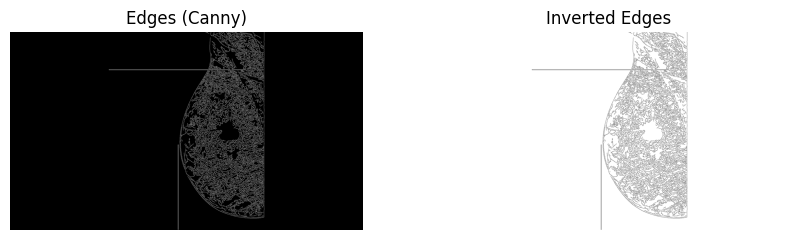

In [182]:
# Detect edges using the Canny edge detector
edges = feature.canny(clahe_image, sigma=1)

# Invert the edges for visualization
I_edges = ~edges

# Display the edges and inverted edges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.title("Edges (Canny)")

plt.subplot(1, 2, 2)
plt.imshow(I_edges, cmap="gray")
plt.axis("off")
plt.title("Inverted Edges")
plt.show()


Generate Tumor Mask

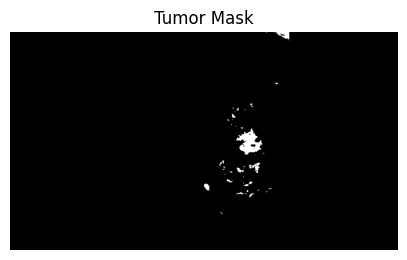

In [183]:
# Create a tumor mask (assumes tumors are the brightest areas)
tumor_mask = clahe_image > 0.9

# Display the tumor mask
plt.figure(figsize=(5, 5))
plt.imshow(tumor_mask, cmap="gray")
plt.axis("off")
plt.title("Tumor Mask")
plt.show()


Label Regions and Annotate Tumor

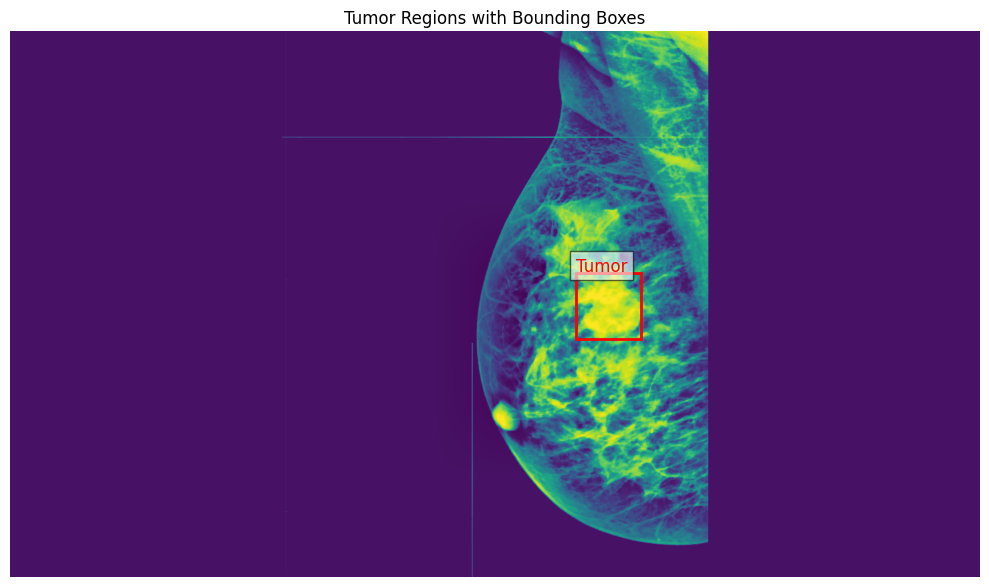

In [184]:
# Label connected regions in the tumor mask
label_image = measure.label(tumor_mask)

# Get region properties
regions = measure.regionprops(label_image)

# Overlay regions and annotate tumor areas
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(clahe_image)

# Loop through the regions and draw bounding boxes
for region in regions:
    if 1700 <= region.area <= 10000:  # Area threshold
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

        # Annotate the region
        text_x = minc
        text_y = minr - 5 if minr - 5 > 0 else minr + 25
        plt.text(text_x, text_y, 'Tumor', color='red', fontsize=12,
                 bbox=dict(facecolor='white', alpha=0.6))

ax.set_axis_off()

plt.title("Tumor Regions with Bounding Boxes")
plt.tight_layout()
plt.show()


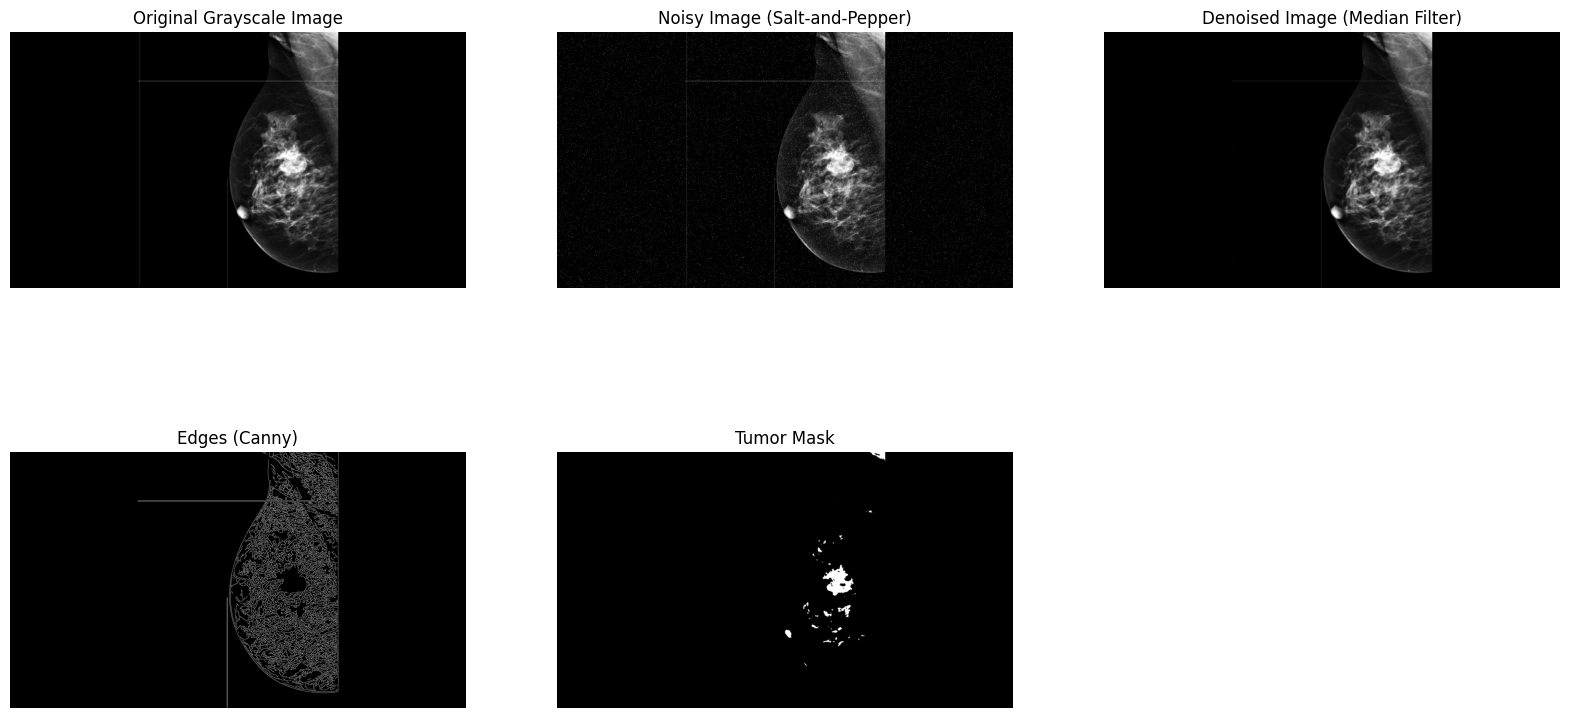

In [185]:
# Display all major steps in one visualization
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.title("Original Grayscale Image")

plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap="gray")
plt.axis("off")
plt.title("Noisy Image (Salt-and-Pepper)")

plt.subplot(2, 3, 3)
plt.imshow(denoised_image, cmap="gray")
plt.axis("off")
plt.title("Denoised Image (Median Filter)")

plt.subplot(2, 3, 4)
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.title("Edges (Canny)")

plt.subplot(2, 3, 5)
plt.imshow(tumor_mask, cmap="gray")
plt.axis("off")
plt.title("Tumor Mask")

plt.show()
